# Siamese Network: Face Recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import pickle

In [2]:
with open("faces.pkl", "rb") as file:
    database = pickle.load(file)

database

{'danielle': array([[[154, 158, 143],
         [139, 143, 128],
         [131, 135, 120],
         ...,
         [ 75,  67,  54],
         [ 88,  84,  73],
         [101, 102,  96]],
 
        [[151, 158, 142],
         [139, 143, 128],
         [136, 140, 125],
         ...,
         [ 75,  66,  51],
         [ 87,  88,  82],
         [121, 127, 123]],
 
        [[153, 157, 142],
         [140, 144, 129],
         [137, 144, 128],
         ...,
         [ 75,  69,  55],
         [ 84,  86,  81],
         [118, 129, 131]],
 
        ...,
 
        [[ 91,  65,  50],
         [ 85,  62,  48],
         [ 82,  60,  49],
         ...,
         [114,  66,  46],
         [146,  91,  71],
         [184, 124, 100]],
 
        [[ 82,  65,  55],
         [ 79,  62,  52],
         [ 80,  64,  51],
         ...,
         [100,  53,  35],
         [131,  79,  58],
         [175, 121,  97]],
 
        [[ 76,  66,  57],
         [ 78,  65,  56],
         [ 78,  65,  56],
         ...,
         [ 92,  

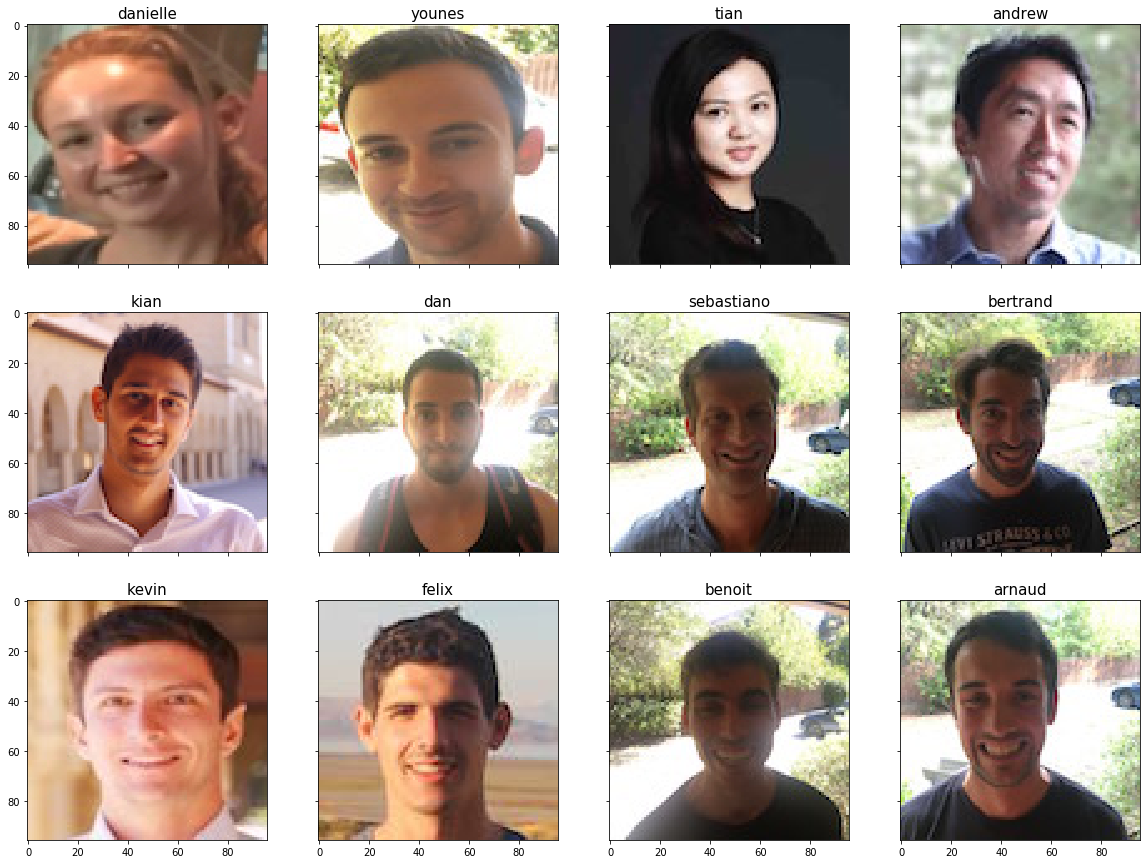

In [3]:
nrows = 3
ncols = len(database)//3
fig, axes = plt.subplots(figsize=(5*ncols, 5*nrows), nrows=nrows, ncols=ncols, sharex=True, sharey=True)
for i in range(nrows):
    for j in range(ncols):
        img = list(database.values())[ncols*i+j]
        axes[i,j].set_title(list(database.keys())[ncols*i+j], fontsize=15)
        axes[i,j].imshow(img)

In [4]:
class Inception_Block_1a(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=128, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.Conv2D(filters=16, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f9 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f10 = tf.keras.layers.Activation(activation='relu')
        self.f11 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f12 = tf.keras.layers.Conv2D(filters=32, 
                                          kernel_size=(5,5), 
                                          strides=(1,1), 
                                          padding='valid', 
                                          activation='linear', 
                                          kernel_initializer='glorot_uniform', 
                                          bias_initializer='zeros')
        self.f13 = tf.keras.layers.BatchNormalization(axis=-1,
                                                      epsilon=0.00001)
        self.f14 = tf.keras.layers.Activation(activation='relu')
        self.f15 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                                strides=(2,2), 
                                                padding='valid')
        self.f16 = tf.keras.layers.Conv2D(filters=32, 
                                          kernel_size=(1,1), 
                                          strides=(1,1), 
                                          padding='valid', 
                                          activation='linear', 
                                          kernel_initializer='glorot_uniform', 
                                          bias_initializer='zeros')
        self.f17 = tf.keras.layers.BatchNormalization(axis=-1,
                                                      epsilon=0.00001)
        self.f18 = tf.keras.layers.Activation(activation='relu')
        self.f19 = tf.keras.layers.ZeroPadding2D(padding=((3,4),(3,4)))
        self.f20 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f21 = tf.keras.layers.BatchNormalization(axis=-1,
                                                      epsilon=0.00001)
        self.f22 = tf.keras.layers.Activation(activation='relu')
        self.f23 = tf.keras.layers.Concatenate()
                                                 
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(inputs)
        a16 = self.f16(a15)
        a17 = self.f17(a16)
        a18 = self.f18(a17)
        a19 = self.f19(a18)
        a20 = self.f20(inputs)
        a21 = self.f21(a20)
        a22 = self.f22(a21)
        y = self.f23([a7,a14,a19,a22])
        return y

In [5]:
class Inception_Block_1b(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=128, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.Conv2D(filters=32, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f9 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f10 = tf.keras.layers.Activation(activation='relu')
        self.f11 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f12 = tf.keras.layers.Conv2D(filters=64, 
                                          kernel_size=(5,5), 
                                          strides=(1,1), 
                                          padding='valid', 
                                          activation='linear', 
                                          kernel_initializer='glorot_uniform', 
                                          bias_initializer='zeros')
        self.f13 = tf.keras.layers.BatchNormalization(axis=-1,
                                                      epsilon=0.00001)
        self.f14 = tf.keras.layers.Activation(activation='relu')
        self.f15 = tf.keras.layers.AveragePooling2D(pool_size=(3,3), 
                                                    strides=(3,3), 
                                                    padding='valid')
        self.f16 = tf.keras.layers.Conv2D(filters=64, 
                                          kernel_size=(1,1), 
                                          strides=(1,1), 
                                          padding='valid', 
                                          activation='linear', 
                                          kernel_initializer='glorot_uniform', 
                                          bias_initializer='zeros')
        self.f17 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f18 = tf.keras.layers.Activation(activation='relu')
        self.f19 = tf.keras.layers.ZeroPadding2D(padding=(4,4))
        self.f20 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f21 = tf.keras.layers.BatchNormalization(axis=-1,
                                                      epsilon=0.00001)
        self.f22 = tf.keras.layers.Activation(activation='relu')
        self.f23 = tf.keras.layers.Concatenate()
                                                 
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(inputs)
        a16 = self.f16(a15)
        a17 = self.f17(a16)
        a18 = self.f18(a17)
        a19 = self.f19(a18)
        a20 = self.f20(inputs)
        a21 = self.f21(a20)
        a22 = self.f22(a21)
        y = self.f23([a7,a14,a19,a22])
        return y

In [6]:
class Inception_Block_1c(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=128, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=256, 
                                         kernel_size=(3,3), 
                                         strides=(2,2), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.Conv2D(filters=32, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f9 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f10 = tf.keras.layers.Activation(activation='relu')
        self.f11 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f12 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(5,5), 
                                         strides=(2,2), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f13 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f14 = tf.keras.layers.Activation(activation='relu')
        self.f15 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                                strides=(2,2), 
                                                padding='valid')
        self.f16 = tf.keras.layers.ZeroPadding2D(padding=((0,1),(0,1)))
        self.f17 = tf.keras.layers.Concatenate()
                                                    
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(inputs)
        a16 = self.f16(a15)
        y = self.f17([a7,a14,a16])
        return y

In [7]:
class Inception_Block_2a(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=192, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.Conv2D(filters=32, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f9 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f10 = tf.keras.layers.Activation(activation='relu')
        self.f11 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f12 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(5,5), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f13 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f14 = tf.keras.layers.Activation(activation='relu')
        self.f15 = tf.keras.layers.AveragePooling2D(pool_size=(3,3), 
                                                    strides=(3,3), 
                                                    padding='valid')
        self.f16 = tf.keras.layers.Conv2D(filters=128, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f17 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f18 = tf.keras.layers.Activation(activation='relu')
        self.f19 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f20 = tf.keras.layers.Conv2D(filters=256, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f21 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f22 = tf.keras.layers.Activation(activation='relu')
        self.f23 = tf.keras.layers.Concatenate(axis=3)
                                                 
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(inputs)
        a16 = self.f16(a15)
        a17 = self.f17(a16)
        a18 = self.f18(a17)
        a19 = self.f19(a18)
        a20 = self.f20(inputs)
        a21 = self.f21(a20)
        a22 = self.f22(a21)
        y = self.f23([a7,a14,a19,a22])
        return y

In [8]:
class Inception_Block_2b(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=160, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=256, 
                                         kernel_size=(3,3), 
                                         strides=(2,2), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f9 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f10 = tf.keras.layers.Activation(activation='relu')
        self.f11 = tf.keras.layers.ZeroPadding2D(padding=(2,2))
        self.f12 = tf.keras.layers.Conv2D(filters=128, 
                                         kernel_size=(5,5), 
                                         strides=(2,2), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f13 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f14 = tf.keras.layers.Activation(activation='relu')
        self.f15 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                                strides=(2,2), 
                                                padding='valid')
        self.f16 = tf.keras.layers.ZeroPadding2D(padding=((0,1),(0,1)))
        self.f17 = tf.keras.layers.Concatenate(axis=3)
                                             
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(inputs)
        a16 = self.f16(a15)
        y = self.f17([a7,a14,a16])
        return y

In [9]:
class Inception_Block_3a(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=384, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.AveragePooling2D(pool_size=(3,3), 
                                                   strides=(3,3), 
                                                   padding='valid')
        self.f9 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f10 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f11 = tf.keras.layers.Activation(activation='relu')
        self.f12 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f13 = tf.keras.layers.Conv2D(filters=256, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f14 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f15 = tf.keras.layers.Activation(activation='relu')
        self.f16 = tf.keras.layers.Concatenate(axis=3)
                                        
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(inputs)
        a14 = self.f14(a13)
        a15 = self.f15(a14)
        y = self.f16([a7,a12,a15])
        return y

In [10]:
class Inception_Block_3b(tf.keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.f1 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f2 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f3 = tf.keras.layers.Activation(activation='relu')
        self.f4 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f5 = tf.keras.layers.Conv2D(filters=384, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f6 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f7 = tf.keras.layers.Activation(activation='relu')
        self.f8 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                               strides=(2,2), 
                                               padding='valid')
        self.f9 = tf.keras.layers.Conv2D(filters=96, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f10 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f11 = tf.keras.layers.Activation(activation='relu')
        self.f12 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f13 = tf.keras.layers.Conv2D(filters=256, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f14 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f15 = tf.keras.layers.Activation(activation='relu')
        self.f16 = tf.keras.layers.Concatenate(axis=3)
                                    
    def call(self, inputs):
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(inputs)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(inputs)
        a14 = self.f14(a13)
        a15 = self.f15(a14)
        y = self.f16([a7,a12,a15])
        return y

In [11]:
class FaceRecoModel(tf.keras.Model):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.f1 = tf.keras.layers.ZeroPadding2D(padding=(3,3))
        self.f2 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(7,7), 
                                         strides=(2,2), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f3 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.001)
        self.f4 = tf.keras.layers.Activation(activation='relu')
        self.f5 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f6 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                               strides=(2,2), 
                                               padding='valid')
        self.f7 = tf.keras.layers.Conv2D(filters=64, 
                                         kernel_size=(1,1), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f8 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f9 = tf.keras.layers.Activation(activation='relu')
        
        
        self.f10 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f11 = tf.keras.layers.Conv2D(filters=192, 
                                         kernel_size=(3,3), 
                                         strides=(1,1), 
                                         padding='valid', 
                                         activation='linear', 
                                         kernel_initializer='glorot_uniform', 
                                         bias_initializer='zeros')
        self.f12 = tf.keras.layers.BatchNormalization(axis=-1,
                                                     epsilon=0.00001)
        self.f13 = tf.keras.layers.Activation(activation='relu')
        self.f14 = tf.keras.layers.ZeroPadding2D(padding=(1,1))
        self.f15 = tf.keras.layers.MaxPooling2D(pool_size=(3,3), 
                                               strides=(2,2), 
                                               padding='valid')
        self.f16 = Inception_Block_1a()
        self.f17 = Inception_Block_1b()
        self.f18 = Inception_Block_1c()
        self.f19 = Inception_Block_2a()
        self.f20 = Inception_Block_2b()
        self.f21 = Inception_Block_3a()
        self.f22 = Inception_Block_3b()
        self.f23 = tf.keras.layers.AveragePooling2D(pool_size=(3,3), 
                                                    strides=(1,1), 
                                                    padding='valid')
        self.f24 = tf.keras.layers.Flatten()
        self.f25 = tf.keras.layers.Dense(units=self.output_dim, 
                                    activation='linear', 
                                    kernel_initializer='glorot_uniform', 
                                    bias_initializer='zeros')
        self.f26 = tf.keras.layers.Lambda(function=lambda x: tf.math.l2_normalize(x, axis=1))
        
    def call(self, inputs): 
        a1 = self.f1(inputs)
        a2 = self.f2(a1)
        a3 = self.f3(a2)
        a4 = self.f4(a3)
        a5 = self.f5(a4)
        a6 = self.f6(a5)
        a7 = self.f7(a6)
        a8 = self.f8(a7)
        a9 = self.f9(a8)
        a10 = self.f10(a9)
        a11 = self.f11(a10)
        a12 = self.f12(a11)
        a13 = self.f13(a12)
        a14 = self.f14(a13)
        a15 = self.f15(a14)
        a16 = self.f16(a15)
        a17 = self.f17(a16)
        a18 = self.f18(a17)
        a19 = self.f19(a18)
        a20 = self.f20(a19)
        a21 = self.f21(a20)
        a22 = self.f22(a21)
        a23 = self.f23(a22)
        a24 = self.f24(a23)
        a25 = self.f25(a24)
        y = self.f26(a25)
        return y
    
    def fit(self, x, y, learning_rate=0.01, batch_size=64, epochs=100, beta_1=0.9, beta_2=0.999, epsilon=1e-07, verbose=True):
        loss = tf.keras.losses.CategoricalCrossentropy()
        metric = tf.keras.metrics.CategoricalAccuracy()
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        self.compile(loss=loss, metrics=[metric], optimizer=optimizer)
        self.summary(input_dim=self.input_dim)
        super().fit(x=x, y=y, batch_size=batch_size, epochs=epochs, verbose=verbose)
        
    def summary(self, input_dim):
        x = tf.keras.Input(shape=input_dim)
        y = self(x)
        super().summary()

In [12]:
fr_model = FaceRecoModel(input_dim=(96,96,3), 
                         output_dim=128)

fr_model.summary()

Model: "face_reco_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 102, 102, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        9472      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)    

-----

In [13]:
fr_model_ = tf.keras.models.load_model('FaceReco')
fr_model_.summary()

Model: "FaceRecoModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_23 (ZeroPadding2 (None, 102, 102, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   9472        zero_padding2d_23[0][0]          
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________

In [14]:
database_encoding = {}
for key in database.keys():
    img = np.array(database[key], dtype='float32')
    database_encoding[key] = np.squeeze(fr_model_.predict(np.expand_dims(img/255., axis=0)), axis=0)
database_encoding

{'danielle': array([ 0.11363962,  0.0347134 ,  0.1353884 ,  0.11888167,  0.07770491,
         0.13406183,  0.14894529, -0.14158261, -0.01347575, -0.06270786,
        -0.0676408 ,  0.056239  , -0.00705983,  0.00504685,  0.07105631,
        -0.05478071,  0.04469689,  0.0456815 , -0.04528295, -0.04539031,
        -0.0075489 ,  0.12388834, -0.09664414,  0.17914414,  0.01828596,
        -0.10249684, -0.14428726, -0.03531788, -0.04007351,  0.14181904,
        -0.04342893,  0.119982  , -0.12131982,  0.05067154,  0.08773115,
        -0.05416505,  0.08598388, -0.06347542,  0.0020666 , -0.04184502,
         0.10869663,  0.00911752,  0.06588244, -0.19420594, -0.03129233,
         0.0584944 ,  0.00641842, -0.02783733, -0.02438572, -0.03512106,
         0.15069501, -0.07310797,  0.16760167,  0.01772949,  0.1049191 ,
         0.02819438, -0.00763398,  0.07702295,  0.01688677,  0.01516442,
         0.01575876,  0.11701668, -0.08893173, -0.17964242,  0.06068184,
         0.08776014,  0.06619445, -0.07

In [15]:
def face_verification(identity, image_path):
    img = np.array(plt.imread(image_path), dtype='float32')
    img_encoding = np.squeeze(fr_model_.predict(np.expand_dims(img/255., axis=0)), axis=0)
    dist = np.linalg.norm(database_encoding[identity]-img_encoding)
    if dist<0.7:
        print('Identity verified!')
    else:
        print('Identity not verified!')

Identity verified!


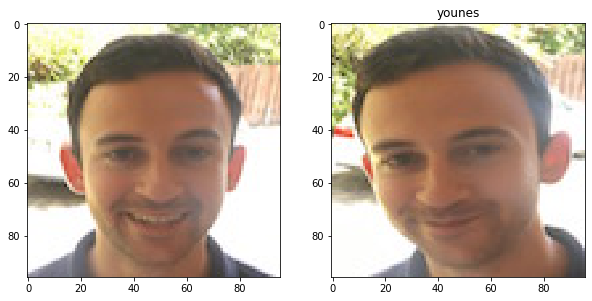

In [16]:
img = np.array(plt.imread('camera_0.jpg'))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.set_title('younes')
ax2.imshow(database['younes'])

face_verification('younes', 'camera_0.jpg')

Identity not verified!


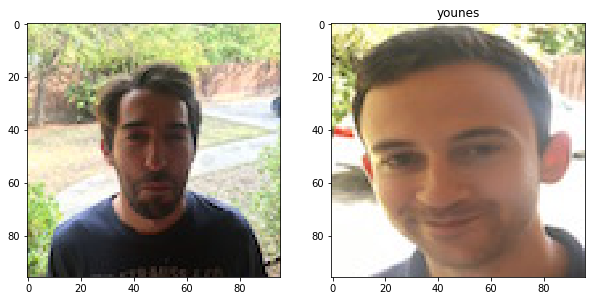

In [17]:
img = np.array(plt.imread('camera_1.jpg'))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.set_title('younes')
ax2.imshow(database['younes'])

face_verification('younes', 'camera_1.jpg')

-----

In [18]:
def face_recognition(image_path):
    img = np.array(plt.imread(image_path), dtype='float32')
    img_encoding = np.squeeze(fr_model_.predict(np.expand_dims(img/255., axis=0)), axis=0)
    min_dist = 100
    identity = ''
    for key in database_encoding.keys():
        dist = np.linalg.norm(database_encoding[key]-img_encoding)
        if dist<min_dist:
            min_dist = dist
            identity = key
    if min_dist>0.7:
        print('Unknown identity!')
    else:
        print("It's {}!".format(identity))

It's younes!


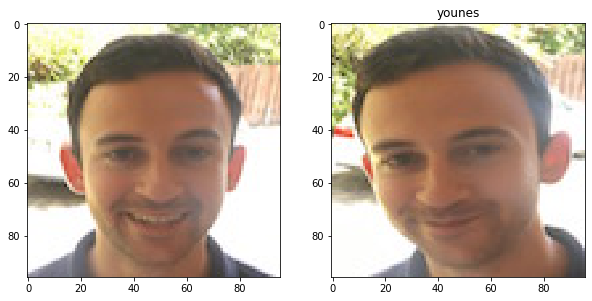

In [19]:
img = np.array(plt.imread('camera_0.jpg'))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.set_title('younes')
ax2.imshow(database['younes'])

face_recognition('camera_0.jpg')

It's bertrand!


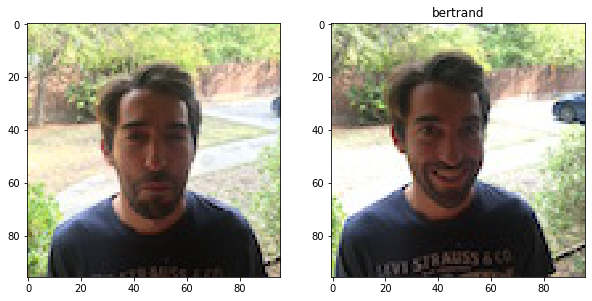

In [20]:
img = np.array(plt.imread('camera_1.jpg'))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.set_title('bertrand')
ax2.imshow(database['bertrand'])

face_recognition('camera_1.jpg')

Unknown identity!


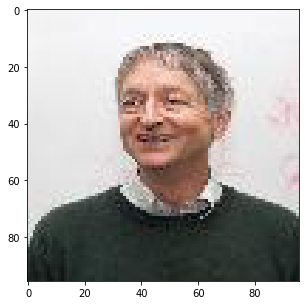

In [21]:
img = np.array(plt.imread('camera_2.jpg'))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

face_recognition('camera_2.jpg')